In [108]:
import pandas as pd
import numpy as np
from collections import Counter

In [109]:
df = pd.read_csv('all_raw.csv')

In [111]:
spectra = df.drop(columns=['Serovar'])
spectra.columns = spectra.columns.astype(float)

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
labels = LabelEncoder().fit_transform(df['Serovar'])

In [114]:
colormap = ['y','r','g','b','m']

In [115]:
spectra

,1995.0,1995.2,1995.4,1995.7,1995.9,1996.1,1996.3,1996.5,1996.7,1996.9,...,19991.4,19992.0,19992.7,19993.4,19994.1,19994.8,19995.4,19996.1,19996.8,19997.5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,190.0,187.0,153.0,162.0,156.0,184.0,177.0,158.0,158.0,156.0
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,103.0,128.0,105.0,119.0,118.0,98.0,91.0,101.0,118.0
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.0,89.0,86.0,85.0,81.0,93.0,86.0,101.0,103.0,82.0
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,237.0,250.0,281.0,265.0,277.0,279.0,257.0,249.0,254.0,239.0


In [116]:
spectra.interpolate(method='polynomial',order=2,axis=1,inplace=True)

In [117]:
print(spectra.shape)
spectra.dropna(axis=1,inplace=True)
print(spectra.shape)

(200, 144004)
(200, 143764)


In [118]:
spectra['Serovar'] = df['Serovar']

In [124]:
spectra.T.to_csv('raw_spectra_transposed.csv',index=False)

In [123]:
spectra.to_csv('raw_spectra.csv',index=False)

In [22]:
import matplotlib.pyplot as plt

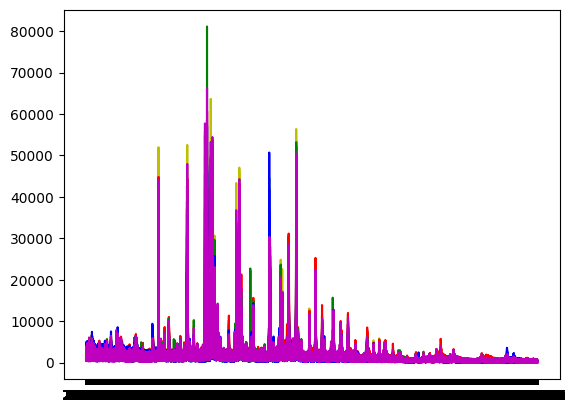

In [12]:
for i in range(spectra.shape[0]):
    plt.plot(spectra.loc[i, :],c=colormap[labels[i]])

## Find Peak

In [18]:
from scipy.signal import find_peaks

In [19]:
sample1 = spectra.iloc[0,:]
print(sample1)

1995.0       NaN
1995.2       NaN
1995.4       NaN
1995.7       NaN
1995.9       NaN
           ...  
19994.8    226.0
19995.4    226.0
19996.1    226.0
19996.8    226.0
19997.5    226.0
Name: 0, Length: 144004, dtype: float64


/var/folders/86/gs0st1rs7pdf8q8ggp52x21h0000gn/T/ipykernel_38548/834732443.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(peaks, sample1[peaks], "x")


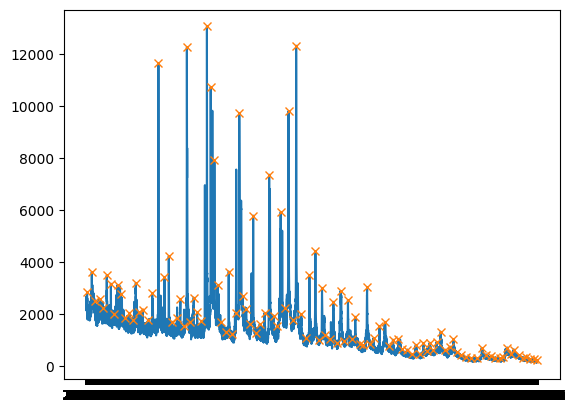

In [23]:
peaks, _ = find_peaks(sample1, distance=1000)
np.diff(peaks)
plt.plot(sample1)
plt.plot(peaks, sample1[peaks], "x")
plt.show()